In [1]:
pip install catboost

     |████████████████████████████████| 12.7 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 1.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [92]:
import pandas as pd
from catboost import CatBoostRegressor, cv, Pool, CatBoostClassifier
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, recall_score

In [76]:
df = pd.read_csv('train_dataset_train.csv',sep=',')
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [77]:
#df2 = pd.read_csv('subway.csv',sep=',')
df2.head(5)

,Unnamed: 0,global_route_id,route_id,route_num,start_station_id,start_station_nm,start_line_id,start_line_nm,all_stations_id,all_stations_nm,station_cnt,transit_cnt,sector_cnt,alternative_route_cnt,route_dur,optimal_route_delta
0,0,7018_10001,10001_7018,9,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",26,3,4,30,64.59,8.58
1,1,7018_10001,10001_7018,1,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",23,1,2,30,56.01,0.00
2,2,7018_10001,10001_7018,2,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",25,2,3,30,61.01,5.00
3,3,7018_10001,10001_7018,3,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",26,2,3,30,61.81,5.80
4,4,7018_10001,10001_7018,4,10001,Борисово,10,Люблинско-Дмитровская,"[10001,10013,10002,10011,10005,10016,10009,100...","[""Борисово"",""Марьино"",""Братиславская"",""Люблино...",25,2,3,30,62.01,6.00


Посмотрим основные статистики

In [78]:
df.describe()

,id,entrance_id,station_id,line_id,time_to_under,label
count,1.091021e+06,1.091021e+06,1.091021e+06,1.091021e+06,1.091021e+06,1.091021e+06
mean,5.455110e+05,8.581884e+02,8.601452e+03,8.590013e+00,5.104668e+02,7.723527e+03
std,3.149508e+05,9.003577e+02,1.247133e+04,1.247157e+01,2.328452e+02,1.167015e+04
min,1.000000e+00,2.000000e+01,1.002000e+03,1.000000e+00,3.001667e+01,1.002000e+03
25%,2.727560e+05,2.150000e+02,3.018000e+03,3.000000e+00,3.229500e+02,3.006000e+03
50%,5.455110e+05,3.370000e+02,7.009000e+03,7.000000e+00,5.686833e+02,6.013000e+03
75%,8.182660e+05,2.087000e+03,9.022000e+03,9.000000e+00,6.838833e+02,9.012000e+03
max,1.091021e+06,2.466000e+03,8.101600e+04,8.100000e+01,1.437417e+03,8.101600e+04


Посмотрим есть ли пропуски в данных

In [79]:
df.isnull().sum()

id                0
ticket_id         0
ticket_type_nm    0
entrance_id       0
entrance_nm       0
station_id        0
station_nm        0
line_id           0
line_nm           0
pass_dttm         0
time_to_under     0
label             0
dtype: int64

# Работа с признаками

Приведем pass_dttm в формат одного числа и создадим признак hour

In [80]:
df['pass_dttm'] = df['pass_dttm'].str.replace('-','').str.replace(' ', '').str.replace(':', '')
df['hour'] = df['pass_dttm'].apply(lambda x: x[8:10]).astype(int)
df['hour'].head()

0    5
1    5
2    5
3    5
4    5
Name: hour, dtype: int64

In [81]:
df['pass_dttm'] = df['pass_dttm'].astype(int)

In [82]:
df.corr()

,id,entrance_id,station_id,line_id,pass_dttm,time_to_under,label,hour
id,1.000000,-0.010487,-0.005903,-0.005902,0.990385,-0.235125,-0.007933,0.266252
entrance_id,-0.010487,1.000000,0.368080,0.368037,-0.007272,-0.002029,0.107758,-0.013729
station_id,-0.005903,0.368080,1.000000,1.000000,-0.003992,0.001836,0.193639,-0.008044
line_id,-0.005902,0.368037,1.000000,1.000000,-0.003990,0.001838,0.193630,-0.008046
pass_dttm,0.990385,-0.007272,-0.003992,-0.003990,1.000000,-0.164318,-0.002920,0.164989
time_to_under,-0.235125,-0.002029,0.001836,0.001838,-0.164318,1.000000,0.033850,-0.678177
label,-0.007933,0.107758,0.193639,0.193630,-0.002920,0.033850,1.000000,-0.031774
hour,0.266252,-0.013729,-0.008044,-0.008046,0.164989,-0.678177,-0.031774,1.000000


Удалим entrance_id, station_id, line_id - дублирующие числовые признаки, entrance_nm, line_nm - не имеет особого значения, id, ticket_id - просто уникальные идентификаторы, не нужны, pass_dttm - решили оставить только hour

In [83]:
columns_to_drop = ['entrance_id', 'station_id', 'line_id', 'entrance_nm', 'line_nm', 'id', 'ticket_id', 'pass_dttm']
df.drop(columns_to_drop, axis = 1, inplace = True)

In [84]:
df.head(10)

,ticket_type_nm,station_nm,time_to_under,label,hour
0,Пропуск FacePay,Лефортово,216.316667,8001,5
1,СК учащегося 30 дней,Войковская,648.183333,9011,5
2,БСК дружинника г.Москвы,Войковская,865.333333,7022,5
3,30 дней,Войковская,1048.233333,2022,5
4,КОШЕЛЕК,Войковская,965.600000,2017,5
5,СК студента 30 дней,Аэропорт,148.683333,11012,5
6,Пропуск FacePay,Косино,192.150000,15001,5
7,Пропуск FacePay,Котельники,229.400000,7014,5
8,90 дней,Аэропорт,720.616667,5007,5
9,СК студента 30 дней,Сокол,329.433333,6018,5


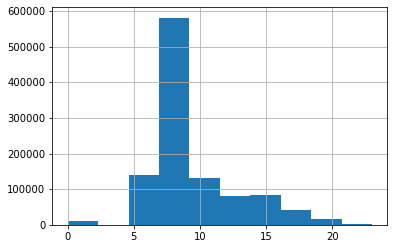

In [74]:
df['hour'].hist()

# Задача регрессии

In [85]:
df_regr = df
df_regr.head(10)

,ticket_type_nm,station_nm,time_to_under,label,hour
0,Пропуск FacePay,Лефортово,216.316667,8001,5
1,СК учащегося 30 дней,Войковская,648.183333,9011,5
2,БСК дружинника г.Москвы,Войковская,865.333333,7022,5
3,30 дней,Войковская,1048.233333,2022,5
4,КОШЕЛЕК,Войковская,965.600000,2017,5
5,СК студента 30 дней,Аэропорт,148.683333,11012,5
6,Пропуск FacePay,Косино,192.150000,15001,5
7,Пропуск FacePay,Котельники,229.400000,7014,5
8,90 дней,Аэропорт,720.616667,5007,5
9,СК студента 30 дней,Сокол,329.433333,6018,5


In [86]:
x_regr_train, x_regr_test, y_regr_train, y_regr_test = train_test_split(df_regr.drop(columns=['time_to_under']), df_regr[['time_to_under']], test_size=0.3, random_state = 22)

In [88]:
pool_train = Pool(x_regr_train, y_regr_train, cat_features = ['ticket_type_nm', 'station_nm'])
pool_test = Pool(x_regr_test, cat_features = ['ticket_type_nm', 'station_nm'])

In [89]:
mdl = CatBoostRegressor()

In [90]:
mdl.fit(pool_train)

Learning rate set to 0.116865
0:	learn: 219.7368260	total: 466ms	remaining: 7m 45s
1:	learn: 208.9389070	total: 530ms	remaining: 4m 24s
2:	learn: 199.9576629	total: 648ms	remaining: 3m 35s
3:	learn: 192.6876164	total: 738ms	remaining: 3m 3s
4:	learn: 186.7161904	total: 839ms	remaining: 2m 46s
5:	learn: 181.9613630	total: 902ms	remaining: 2m 29s
6:	learn: 178.0532302	total: 978ms	remaining: 2m 18s
7:	learn: 174.8049685	total: 1.05s	remaining: 2m 10s
8:	learn: 172.2607079	total: 1.13s	remaining: 2m 4s
9:	learn: 170.1446000	total: 1.25s	remaining: 2m 3s
10:	learn: 168.4933662	total: 1.34s	remaining: 2m
11:	learn: 167.1715447	total: 1.42s	remaining: 1m 56s
12:	learn: 166.0223376	total: 1.53s	remaining: 1m 56s
13:	learn: 165.1405391	total: 1.61s	remaining: 1m 53s
14:	learn: 164.4429225	total: 1.69s	remaining: 1m 51s
15:	learn: 163.8681392	total: 1.78s	remaining: 1m 49s
16:	learn: 163.4133192	total: 1.85s	remaining: 1m 47s
17:	learn: 163.0500677	total: 1.91s	remaining: 1m 44s
18:	learn: 162.

152:	learn: 158.8205927	total: 13.6s	remaining: 1m 15s
153:	learn: 158.8092136	total: 13.7s	remaining: 1m 15s
154:	learn: 158.7998627	total: 13.8s	remaining: 1m 15s
155:	learn: 158.7965352	total: 13.9s	remaining: 1m 14s
156:	learn: 158.7882189	total: 13.9s	remaining: 1m 14s
157:	learn: 158.7794170	total: 14s	remaining: 1m 14s
158:	learn: 158.7728209	total: 14.1s	remaining: 1m 14s
159:	learn: 158.7637800	total: 14.2s	remaining: 1m 14s
160:	learn: 158.7531254	total: 14.3s	remaining: 1m 14s
161:	learn: 158.7417425	total: 14.4s	remaining: 1m 14s
162:	learn: 158.7351207	total: 14.4s	remaining: 1m 14s
163:	learn: 158.7314842	total: 14.5s	remaining: 1m 13s
164:	learn: 158.7261383	total: 14.6s	remaining: 1m 13s
165:	learn: 158.7197760	total: 14.7s	remaining: 1m 13s
166:	learn: 158.7095818	total: 14.7s	remaining: 1m 13s
167:	learn: 158.6995266	total: 14.8s	remaining: 1m 13s
168:	learn: 158.6944440	total: 14.9s	remaining: 1m 13s
169:	learn: 158.6876360	total: 15s	remaining: 1m 13s
170:	learn: 15

305:	learn: 157.8188676	total: 28.1s	remaining: 1m 3s
306:	learn: 157.8154096	total: 28.2s	remaining: 1m 3s
307:	learn: 157.8133079	total: 28.3s	remaining: 1m 3s
308:	learn: 157.8053179	total: 28.4s	remaining: 1m 3s
309:	learn: 157.8017246	total: 28.5s	remaining: 1m 3s
310:	learn: 157.8003650	total: 28.5s	remaining: 1m 3s
311:	learn: 157.7985154	total: 28.6s	remaining: 1m 3s
312:	learn: 157.7947310	total: 28.7s	remaining: 1m 3s
313:	learn: 157.7919300	total: 28.8s	remaining: 1m 2s
314:	learn: 157.7811376	total: 28.9s	remaining: 1m 2s
315:	learn: 157.7760084	total: 29s	remaining: 1m 2s
316:	learn: 157.7711668	total: 29.1s	remaining: 1m 2s
317:	learn: 157.7670751	total: 29.2s	remaining: 1m 2s
318:	learn: 157.7622931	total: 29.3s	remaining: 1m 2s
319:	learn: 157.7610862	total: 29.4s	remaining: 1m 2s
320:	learn: 157.7538936	total: 29.5s	remaining: 1m 2s
321:	learn: 157.7513422	total: 29.5s	remaining: 1m 2s
322:	learn: 157.7495092	total: 29.6s	remaining: 1m 2s
323:	learn: 157.7462780	total:

459:	learn: 157.1724564	total: 43.8s	remaining: 51.4s
460:	learn: 157.1718502	total: 43.8s	remaining: 51.3s
461:	learn: 157.1705859	total: 43.9s	remaining: 51.2s
462:	learn: 157.1661257	total: 44s	remaining: 51.1s
463:	learn: 157.1655992	total: 44.1s	remaining: 50.9s
464:	learn: 157.1615046	total: 44.2s	remaining: 50.9s
465:	learn: 157.1610016	total: 44.3s	remaining: 50.7s
466:	learn: 157.1592090	total: 44.4s	remaining: 50.6s
467:	learn: 157.1545853	total: 44.5s	remaining: 50.6s
468:	learn: 157.1519232	total: 44.6s	remaining: 50.5s
469:	learn: 157.1495761	total: 44.6s	remaining: 50.3s
470:	learn: 157.1473932	total: 44.7s	remaining: 50.2s
471:	learn: 157.1420098	total: 44.8s	remaining: 50.1s
472:	learn: 157.1384916	total: 44.9s	remaining: 50s
473:	learn: 157.1359497	total: 45s	remaining: 49.9s
474:	learn: 157.1326311	total: 45.1s	remaining: 49.9s
475:	learn: 157.1301730	total: 45.2s	remaining: 49.7s
476:	learn: 157.1243821	total: 45.3s	remaining: 49.6s
477:	learn: 157.1207421	total: 45.

612:	learn: 156.7171182	total: 58.6s	remaining: 37s
613:	learn: 156.7137922	total: 58.7s	remaining: 36.9s
614:	learn: 156.7109186	total: 58.8s	remaining: 36.8s
615:	learn: 156.7074800	total: 58.9s	remaining: 36.7s
616:	learn: 156.7038574	total: 59s	remaining: 36.6s
617:	learn: 156.7012890	total: 59.1s	remaining: 36.6s
618:	learn: 156.6953853	total: 59.3s	remaining: 36.5s
619:	learn: 156.6941496	total: 59.3s	remaining: 36.4s
620:	learn: 156.6907701	total: 59.4s	remaining: 36.3s
621:	learn: 156.6881463	total: 59.5s	remaining: 36.2s
622:	learn: 156.6861806	total: 59.6s	remaining: 36.1s
623:	learn: 156.6847807	total: 59.7s	remaining: 36s
624:	learn: 156.6814142	total: 59.8s	remaining: 35.9s
625:	learn: 156.6790104	total: 59.9s	remaining: 35.8s
626:	learn: 156.6762591	total: 1m	remaining: 35.7s
627:	learn: 156.6730689	total: 1m	remaining: 35.6s
628:	learn: 156.6720176	total: 1m	remaining: 35.5s
629:	learn: 156.6695060	total: 1m	remaining: 35.4s
630:	learn: 156.6670667	total: 1m	remaining: 3

766:	learn: 156.3432010	total: 1m 15s	remaining: 22.9s
767:	learn: 156.3418355	total: 1m 15s	remaining: 22.8s
768:	learn: 156.3388012	total: 1m 15s	remaining: 22.7s
769:	learn: 156.3362649	total: 1m 15s	remaining: 22.7s
770:	learn: 156.3349181	total: 1m 15s	remaining: 22.5s
771:	learn: 156.3336939	total: 1m 15s	remaining: 22.4s
772:	learn: 156.3319300	total: 1m 16s	remaining: 22.3s
773:	learn: 156.3298768	total: 1m 16s	remaining: 22.2s
774:	learn: 156.3290991	total: 1m 16s	remaining: 22.1s
775:	learn: 156.3274929	total: 1m 16s	remaining: 22s
776:	learn: 156.3255729	total: 1m 16s	remaining: 21.9s
777:	learn: 156.3243439	total: 1m 16s	remaining: 21.9s
778:	learn: 156.3226998	total: 1m 16s	remaining: 21.7s
779:	learn: 156.3211306	total: 1m 16s	remaining: 21.6s
780:	learn: 156.3198749	total: 1m 16s	remaining: 21.6s
781:	learn: 156.3181783	total: 1m 16s	remaining: 21.5s
782:	learn: 156.3166995	total: 1m 17s	remaining: 21.4s
783:	learn: 156.3138507	total: 1m 17s	remaining: 21.3s
784:	learn: 

917:	learn: 156.0707760	total: 1m 29s	remaining: 8.01s
918:	learn: 156.0685523	total: 1m 29s	remaining: 7.91s
919:	learn: 156.0681793	total: 1m 29s	remaining: 7.81s
920:	learn: 156.0655947	total: 1m 29s	remaining: 7.71s
921:	learn: 156.0641475	total: 1m 29s	remaining: 7.61s
922:	learn: 156.0616211	total: 1m 30s	remaining: 7.51s
923:	learn: 156.0606219	total: 1m 30s	remaining: 7.42s
924:	learn: 156.0582311	total: 1m 30s	remaining: 7.32s
925:	learn: 156.0570395	total: 1m 30s	remaining: 7.22s
926:	learn: 156.0558998	total: 1m 30s	remaining: 7.13s
927:	learn: 156.0546978	total: 1m 30s	remaining: 7.03s
928:	learn: 156.0527293	total: 1m 30s	remaining: 6.93s
929:	learn: 156.0518088	total: 1m 30s	remaining: 6.83s
930:	learn: 156.0513022	total: 1m 30s	remaining: 6.73s
931:	learn: 156.0504221	total: 1m 30s	remaining: 6.63s
932:	learn: 156.0482523	total: 1m 31s	remaining: 6.54s
933:	learn: 156.0461234	total: 1m 31s	remaining: 6.44s
934:	learn: 156.0424063	total: 1m 31s	remaining: 6.34s
935:	learn

In [91]:
regres_pred = mdl.predict(pool_test)

In [93]:
r2 = r2_score(y_regr_test, regres_pred)
r2

0.5481232421775921

# Задача классификации

In [137]:
df_clf = df.iloc[:10000, :]
#df_clf.head(10)
df_clf

,ticket_type_nm,station_nm,time_to_under,label,hour
0,Пропуск FacePay,Лефортово,216.316667,8001,5
1,СК учащегося 30 дней,Войковская,648.183333,9011,5
2,БСК дружинника г.Москвы,Войковская,865.333333,7022,5
3,30 дней,Войковская,1048.233333,2022,5
4,КОШЕЛЕК,Войковская,965.600000,2017,5
...,...,...,...,...,...
9995,90 дней ЕДИНЫЙ ТК,Автозаводская,767.216667,2004,6
9996,СК студента 30 дней,Планерная,554.400000,7002,6
9997,30 дней ЕДИНЫЙ ТК,Электрозаводская,827.816667,2016,6
9998,30 дней Пригород ТК,Славянский бульвар,555.350000,6018,6


In [138]:
x_clf_train, x_clf_test, y_clf_train, y_clf_test = train_test_split(df_clf.drop(columns=['label']), df_clf[['label']], test_size=0.3, random_state = 22)

In [139]:
pool_train2 = Pool(x_clf_train, y_clf_train, cat_features = ['ticket_type_nm', 'station_nm'])
pool_test2 = Pool(x_clf_test, cat_features = ['ticket_type_nm', 'station_nm'])

In [140]:
clf = CatBoostClassifier(iterations = 50, depth = 3)

In [141]:
clf.fit(pool_train2)

Learning rate set to 0.5
0:	learn: 5.7034489	total: 4.48s	remaining: 3m 39s
1:	learn: 6.0262760	total: 7.98s	remaining: 3m 11s
2:	learn: 5.7548937	total: 11.7s	remaining: 3m 3s
3:	learn: 5.4695725	total: 15.3s	remaining: 2m 55s
4:	learn: 5.4386402	total: 18.9s	remaining: 2m 50s
5:	learn: 5.6280151	total: 22.7s	remaining: 2m 46s
6:	learn: 5.2674223	total: 26.3s	remaining: 2m 41s
7:	learn: 5.1493090	total: 30.3s	remaining: 2m 39s
8:	learn: 5.1185829	total: 34.5s	remaining: 2m 36s
9:	learn: 5.0884789	total: 38.2s	remaining: 2m 32s
10:	learn: 5.0514314	total: 42s	remaining: 2m 28s
11:	learn: 5.0243538	total: 45.7s	remaining: 2m 24s
12:	learn: 4.9499852	total: 49.5s	remaining: 2m 20s
13:	learn: 4.9245733	total: 53.3s	remaining: 2m 17s
14:	learn: 4.8995579	total: 57.1s	remaining: 2m 13s
15:	learn: 4.8427871	total: 1m	remaining: 2m 9s
16:	learn: 4.8284946	total: 1m 4s	remaining: 2m 5s
17:	learn: 4.8187258	total: 1m 8s	remaining: 2m 1s
18:	learn: 4.7848571	total: 1m 12s	remaining: 1m 58s
19:	l

In [142]:
clf_pred = clf.predict(pool_test2)

In [143]:
rec = recall_score(y_clf_test, clf_pred, average='micro')
rec

0.08433333333333333

# Результат

In [145]:
result = 0.5*r2 + 0.5*rec
result

0.31622828775546274